<a href="https://colab.research.google.com/github/Mo-rr-is/DS_and_AI/blob/main/Computer-Vision/classification_zero_shots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv8


*   Mostly known for object detection and classification and segmentation tasks.
*   A single shot algorithm - classifies an object in a single pass by having one NN predict bounding boxes and class probabilities using a full image as an input.
*   Based on the number of parameters it comes in 5 variants:
  * nano (n)
  * small (s)
  * medium (m)
  * large (l)
  * extra large (x)



## Settings

In [2]:
!pip install ultralytics
!pip install -U ipywidgets

import urllib.request

## Get test file

In [3]:
url = "https://raw.githubusercontent.com/Marconi-Lab/dsa_2024/main/assets/2021-07-09-09-09-05.jpg?token=GHSAT0AAAAAACNP3JI5UPICZE4YTEBAVAXMZSDSKDA"
urllib.request.urlretrieve(url, "2021-07-09-09-09-05.jpg")
print("Sample Image file downloaded successfully!")
url = "https://raw.githubusercontent.com/Marconi-Lab/dsa_2024/main/assets/labels_map.txt?token=GHSAT0AAAAAACNP3JI47XCPJVVVAMHLSET4ZSDSLTA"
urllib.request.urlretrieve(url, "labels_map.txt")
print("Labels File downloaded successfully!")


image_path='/content/2021-07-09-09-09-05.jpg'

Sample Image file downloaded successfully!
Labels File downloaded successfully!


## Modelling

In [4]:
# # Load the ImageNet class labels
import json
with open("/content/labels_map.txt","r") as f:
  classes_dict = json.load(f)

In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

## Load a model
# model = YOLO('yolov8n-cls.yaml') # build a new model from YAML
# model = YOLO('yolov8n-cls.pt') # load a pretrained model (for training)
model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt') # build from YAML and transfer weights

# Predict with the model
results = model(image_path) # predict on an image

YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs


100%|██████████| 5.30M/5.30M [00:00<00:00, 18.7MB/s]


Transferred 158/158 items from pretrained weights

image 1/1 /content/2021-07-09-09-09-05.jpg: 640x640 352 0.14, 353 0.10, 273 0.03, 173 0.03, 351 0.03, 220.9ms
Speed: 82.1ms preprocess, 220.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


In [6]:
names_dict = results[0].names

probs = results[0].probs.data.tolist()

print("Top 1 Class : ", results[0].probs.top1)
print("Top 1 Confidence : ", results[0].probs.top1conf)

Top 1 Class :  352
Top 1 Confidence :  tensor(0.1351)


impala, Aepyceros melampus    13.513454794883728%


100%|██████████| 755k/755k [00:00<00:00, 4.10MB/s]


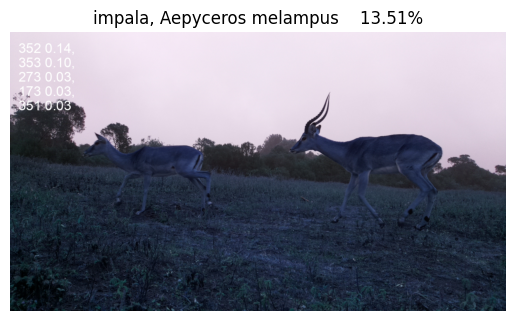

In [7]:
title = f"{str(classes_dict[str(results[0].probs.top1)]) + '    '+str(results[0].probs.top1conf.item()*100)+'%'}"
print(title)
plt.imshow(results[0].plot())
plt.axis('off')
# Add the title
title = f"{str(classes_dict[str(results[0].probs.top1)]) + '    '+str(round(float(results[0].probs.top1conf.item()*100),2))+'%'}"
plt.title(title)
# Show the plot
plt.show()